Klaudia Jaśko,  <br />
4 rok Iformatyka, <br />
NS  <br />
 <h1> Klasyfikator wspomagający diagnozę raka (Breast Cancer Wisconsin)<h1>

<h2> 1. Wstęp </h2>
    
    Zadanie klasyfikacji jest jednym z wielu rozpatrywanych problemów uczenia maszynowego, należącym do podkategorii uczenia nadzorowanego. Polega na przypisaniu dyskretnych etykiet klas do obiektów powiązanych z zadanym wzorem.Uczenie nadzorowane polega na dostarczeniu do modelu oznakowanych danych uczących. Oznacza to, że maszyna oprócz samego zbioru do nauki otrzymuje również oczekiwaną odpowiedź. Jej zadaniem jest nauczenie się generalizacji wzorców i przewidywanie  prawidłowej klasy obiektu pochodzącego z danych, z którymi wcześniej się nie zetknęła. Uczenie nadzorowane jest szeroko wykorzystywane w  instytucjach finansowych głównie w zarządzaniu ryzykiem, jak również przy rozpoznawaniu mowy, tekstu czy obrazu [S. Raschka: „Python Uczenie Maszynowe”, Helion, Gliwice, 2017].

<h2> 2. Przygotowanie danych </h2>
    
    Na początku projektu zaimportowano biblioteki potrzebne do wstępnej analizy danych wejściowych oraz wczytano plik .csv

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data= pd.read_csv('data.csv')

Następnie przystąpiono do analizy danych wejściowych z pliku data.csv.


In [40]:
display(data.head())
data.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)

Plik składa się z 569 wierszy i 33 kolumn. Najważniejsza kolumna to'diagnosis', ponieważ te ceche będzie przewidywał wybrany klasifikator. 

In [9]:
print(data.diagnosis.unique())

['M' 'B']


Kolumna 'diagnosis' zawiera 2 unikalne wartości. 'M' oznacza 'Malignant' czyli przypadek złośliwy nowotworu, natomiast 'B' 'Benign' - łagodny. Aby ta cecha była poprawnie przewidywana przez klasyfikator dane kategoryczne muszą zostać zamienione na dane numeryczne.

In [41]:
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M': 1}).astype(int)

'M' zastąpiono cyfrą 1 nagomiast 'B' cyfrą 0. 

In [5]:
display(data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Następnie sprawdzono czy w kolumna nie pojawiają się wartości NULL. 

In [42]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Kolumna Unnamed zawiera tylko wartości NULL, więc zostaje ona usunięta.

In [43]:
data=data.drop('Unnamed: 32', axis=1)

In [8]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2> 3. Zbadanie zależności pomiędzy cechami </h2>
    

Na podstawie analizy korelacji zdecydowano o wyborze zmiennych do modelu. Przyjęto, że cechy z kolumną 'diagnosis' muszą mieć współczynnik koreacji przynajmniej 0.77 aby były brane pod uwagę przy następnych etapah projektu. https://www.w3schools.com/python/pandas/pandas_correlations.asp


<AxesSubplot:>

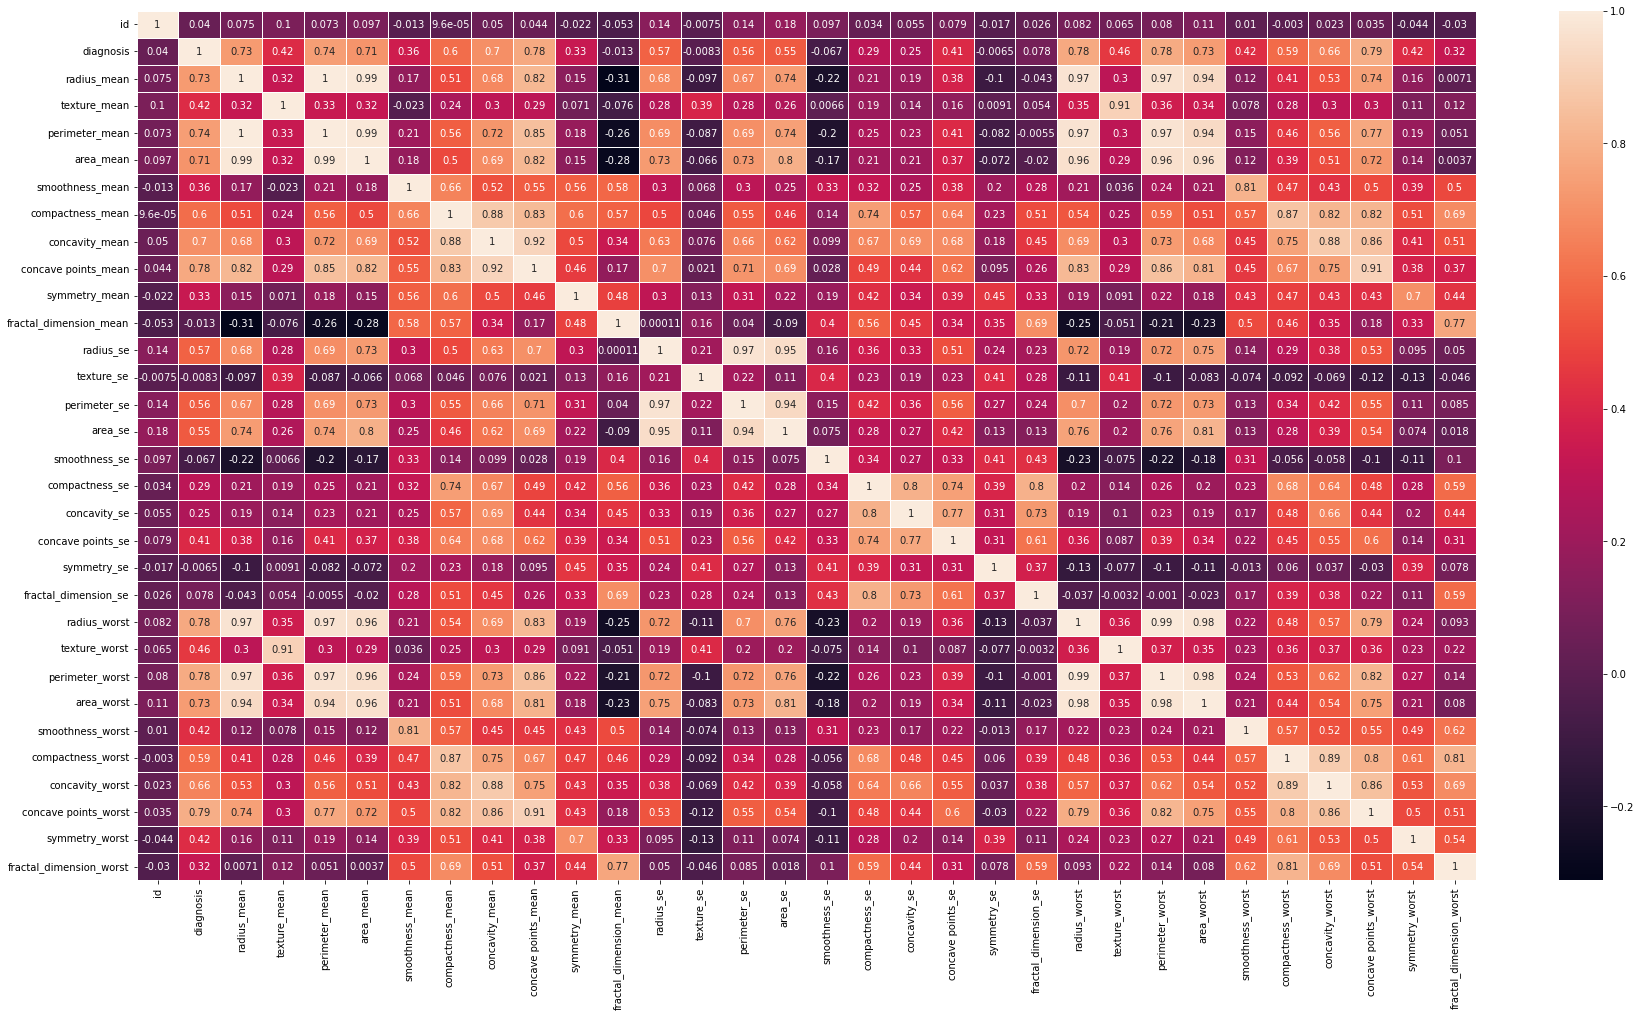

In [44]:
plt.figure(figsize = (30,16))
sns.heatmap(data.corr(), annot=True,linewidths=0.5)

Są to:
<ul>
    <li>'concave points_mean', </li>
    <li>'radius_worst', </li>
    <li>'perimeter_worst', </li>
    <li>'concave points_worst'
</ul>

Stworzono tablicę z nazwami tych cech. A następnie przypisano kolumny z tymi cechami do zmiennej <em>features </em>, do zmiennej <em>target</em> przypisano kolumne 'diagnosis' 

In [45]:
table_corr_max = ['concave points_mean', 'radius_worst', 'perimeter_worst','concave points_worst']

In [46]:
features = data[table_corr_max]
target = data['diagnosis']

In [32]:
features.describe()

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000
mean,0.048919,16.269190,107.261213,0.114606
std,0.038803,4.833242,33.602542,0.065732
min,0.000000,7.930000,50.410000,0.000000
25%,0.020310,13.010000,84.110000,0.064930
50%,0.033500,14.970000,97.660000,0.099930
75%,0.074000,18.790000,125.400000,0.161400
max,0.201200,36.040000,251.200000,0.291000


<h2>4. Standaryzacja<h2>

Standaryzacja danych do modeli machine learning polega na przekształceniu danych pierwotnych, aby ich rozkład miał średnią wartość równą (mean) 0 i odchylenie standardowe równe (std) 1. W przypadku danych <em>features</em> standaryzacja jest niezbędna, ponieważ można zauważyć w tabeli powyżej, że wartości std i mean znacznie odbiegają od tych oczekiwanych. Za pomocą funckji cor() od każdej wartość w kolumnie danych będzie odejmowana średnia wartość kolumny, a wynik będzie podzielony przez odchylenie standardowe kolumny danych.[https://docs.microsoft.com/pl-pl/azure/machine-learning/component-reference/normalize-data] [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html]

$$ z = {x -mean(x) \over stdev(x)} $$


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd.DataFrame(features))
print(scaled_data)

[[ 2.53247522  1.88668963  2.30360062  2.29607613]
 [ 0.54814416  1.80592744  1.53512599  1.0870843 ]
 [ 2.03723076  1.51187025  1.34747521  1.95500035]
 ...
 [ 0.10577736  0.56136143  0.57900058  0.41406869]
 [ 2.65886573  1.96123934  2.30360062  2.28998549]
 [-1.26181958 -1.41089258 -1.43273495 -1.74506282]]


In [34]:
np.std(scaled_data, axis=0)

array([1., 1., 1., 1.])

In [35]:
np.mean(scaled_data, axis=0)

array([-4.99502802e-17, -8.24179623e-16, -3.74627101e-16,  2.24776261e-16])

In [48]:
scaled_data_col = pd.DataFrame(scaled_data, columns = ['concave points_mean', 'radius_worst', 'perimeter_worst','concave points_worst'])
scaled_data_col.head(8)

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,2.532475,1.886690,2.303601,2.296076
1,0.548144,1.805927,1.535126,1.087084
2,2.037231,1.511870,1.347475,1.955000
3,1.451707,-0.281464,-0.249939,2.175786
4,1.428493,1.298575,1.338539,0.729259
5,0.824656,-0.165498,-0.115009,0.905888
6,0.646935,1.368983,1.368325,1.196716
7,0.281950,0.163763,0.099449,0.624196


Po standaryzacji można zauważyć, że średnia i odchylenie standardowe dla wybranych kolumn mają już wartości odpowiednio 1 i 0.

In [23]:
scaled_data_col.describe()

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-8.780323e-17,-7.956924e-16,-4.015534e-16,3.203842e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-1.261820e+00,-1.726901e+00,-1.693361e+00,-1.745063e+00
25%,-7.379438e-01,-6.749213e-01,-6.895783e-01,-7.563999e-01
50%,-3.977212e-01,-2.690395e-01,-2.859802e-01,-2.234689e-01
75%,6.469351e-01,5.220158e-01,5.402790e-01,7.125100e-01
max,3.927930e+00,4.094189e+00,4.287337e+00,2.685877e+00


<h2> 5. Podział danych na zbiór testowy i treningowy </h2>

Następnie, po przygotowaniu danych podzielono je na zbiór treningowy (część wykorzystywana w uczeniu klasyfikatora) i zbiór testowy wykorzystywany do późniejszej klasyfikacji na wyuczonym klasyfikatorze.

Za pomocą funkcji train_test_split podzielono zbiór na 2 części w następujących proporcjach: 
<ul>
    <li> zbiór treningowych -80% </li>
    <li> zbiór testowy -20% </li>
</ul>

In [37]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [53]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 4) (114, 4) (455,) (114,)


<h2> 6. Algorytm MLP </h2>

Klasyfiktor MLP (Multi-layer Perceptron) jest modelem sztucznej sieci neuronowej typu feedforward. Sieć typu MLP ma zwykle strukturę obejmującą warstwy: wejściową, jedną lub dwie warstwy ukryte złożone z neuronów sigmoidalnych(zastosowana jest liniowa agregacja danych wejściowych oraz sigmoidalna funkcja aktywacji) oraz warstwę wyjściową złożoną z neuronów sigmoidalnych lub z neuronów liniowych ( liniową agregacja danych wejściowych i liniowa funkcja aktywacji). <br>
Ogólny wzór na wartość wyjściową neuronu:

$$y = f(w~0~+\sum_{i=1}^{n} w~i~x~i~)$$
<br>
Uczenie perceptronu wielowarstwowego realizowane jest najczęściej przy użyciu metody wstecznej propagacji błędu. Konieczność jej stosowania wynika z tego, że tylko błędy w neuronach warstwy wyjściowej wyznacza się bezpośrednio na podstawie danych wyjściowych
i odpowiedzi wzorcowych zawartych w zbiorze uczącym. Natomiast dla neuronów w warstwach ukrytych błąd musi być wyznaczany właśnie poprzez wsteczną propagację.[Ryszard Tadeusiewicz, Maciej Szaleniec: Leksykon sieci neuronowych] <br>


W kolejnej części projektu sprawdzono jak zmiana parametrów klasifikatora wpłynie na wyniki uczenia. Przyjęto maksymalną liczbę epok (max_iter) 300. Parametry, któe zbadano to:

<ul>
<li>hidden_layer_sizes : Za pomocą tego parametru możemy określić liczbę warstw i liczbę węzłów, które zdefiniowano w klasyfikatorze sieci neuronowej. Każdy element w krotce reprezentuje liczbę węzłów na i-tej pozycji, gdzie i jest indeksem krotki. Długość krotki wskazuje więc na całkowitą liczbę ukrytych warstw w sieci neuronowej.</li>
<li>activation: Funkcja aktywacji dla warstw ukrytych. </li>
<li>solver: Parametr ten określa algorytm optymalizacji wag nad węzłami. </li>
</ul>

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
mlp = MLPClassifier(max_iter=300)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

In [67]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'solver': ['sgd', 'adam']})

Najlepsze wyniki uczenia uzyskano dla:

<ul>
<li>funkcji aktywacji : tangens hiperboliczny (tanh) </li>
<li>rozmiarze wartw ukrytych: 50 wastw ukrytych o rozmiarze 50x50 neuronów. </li>
<li>solver: adam </li>
</ul>

In [72]:
print(clf.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}


<h2> 7. Walidacja modelu na zbiorze testowym i  interpretacja wyników </h2>

Po wybraniu najbardziej optymalnych parametrów następnym etapem jest sprawdzenie modelu na danych testowym, które pozwalają na ocenę wydajności i dokładności modelu.

In [73]:
y_true, y_pred_MLP = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred_MLP))

Results on the test set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Raport z klasyfikacji: <br>
Raport pokazuje główne metryki klasyfikacji precyzję, recall i f1-score na podstawie klasy. Metryki są obliczane przy użyciu prawdziwych i fałszywych pozytywów, prawdziwych i fałszywych negatywów. Pozytywne i negatywne w tym przypadku są ogólnymi nazwami dla przewidywanych klas. Istnieją cztery sposoby sprawdzenia, czy przewidywania są słuszne czy nie:

TN / True Negative: gdy przypadek był negatywny i przewidywany negatywnie
TP / True Positive: kiedy przypadek był pozytywny i przewidywany był pozytywny
FN / False Negative: kiedy przypadek był pozytywny, ale przewidywany był negatywny
FP / False Positive: kiedy przypadek był negatywny, ale przewidywany był pozytywny


Precyzja to zdolność klasyfikatora do nie oznaczania instancji pozytywnej, która w rzeczywistości jest negatywna. Dla każdej klasy jest ona definiowana jako stosunek prawdziwych pozytywów do sumy prawdziwych i fałszywych pozytywów.

$$ Precyzja = {TP \over (TP + FP)} $$

Recall to zdolność klasyfikatora do znalezienia wszystkich pozytywnych instancji. Dla każdej klasy definiuje się go jako stosunek prawdziwych pozytywów do sumy prawdziwych pozytywów i fałszywych negatywów.

$$ Recall = {TP \over (TP+FN)} $$

Wynik F1 jest ważoną średnią harmoniczną precyzji i wycofania, tak że najlepszy wynik to 1.0, a najgorszy to 0.0.


$$ Wynik F1 = {2*(Recall * Precision) \over (Recall + Precision)} $$

Na poniższym wykresie można zauważyć, że algorytm na 114 przypadków pomylił się tylko 4 razy.W przypadku danych medycznych klasyfikująch schorzenia pacjentów dużo ważniejsza jest metryka FP, gdzie tych błędych oznaczeń jest 3 niż metryka FN z jednym błędnie sklasyfikowanym przypadkiem, ponieważ dąży się do jak najmniejszej liczby pacjentów u których nie wykryto nowotworu na czas. <br>
Być może przyjęcie innego klasyfikatora lub szersza optymalizacja danych dałyby bardziej zadowalające wyniki.

C:\Users\jasko\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


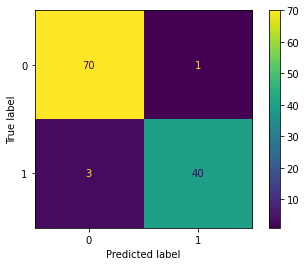

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)
plt.show()

<h2> Bibliografia </h2>

<ul>
<li>S. Raschka: „Python Uczenie Maszynowe”, Helion, Gliwice, 2017
<li>https://www.w3schools.com/python/pandas/pandas_correlations.asp
<li>https://docs.microsoft.com/pl-pl/azure/machine-learning/component-reference/normalize-data]
<li>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html]
<li>Ryszard Tadeusiewicz, Maciej Szaleniec: Leksykon sieci neuronowych
<li>https://scikit-learn.org/stable/modules/preprocessing.html 
<li>https://ksopyla.com/machine-learning/grid-random-search-scikit-learn-dobor-parametrow/ 
<li>https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier 
<li>http://sigmaquality.pl/uncategorized/standaryzacja-danych-do-modeli-machine-learning-za-pomoca-standardscaler/ 
<li>https://www.markdownguide.org/basic-syntax/ 
</ul>